# Chapter 5: Support Vector Machines (SVM)

**Tujuan:** Memahami SVM untuk klasifikasi linear & non‑linear, margin fleksibel, kernel, dan SVM regression.

---

## 1. Linear SVM Classification

* **Inti:** Cari hyperplane

  $
  w^T x + b = 0
  $

  yang memaksimalkan margin (jarak ke titik terdekat).
* **Hard‑margin:** data harus separable sempurna.
* **Soft‑margin:** toleransi kesalahan dengan parameter **C** (semakin besar \$C\$ → semakin sedikit toleransi).

Margin maksimal \$\leftrightarrow\$ minimize

$
\|w\|^2 \quad \text{s.t.} \quad y^{(i)}(w^T x^{(i)} + b) \ge 1 - \xi_i,\ \xi_i \ge 0
$

\$\sum \xi\_i\$ dipenalti oleh \$C\$.

---

## 2. Non‑Linear SVM: Kernel Trick

* Saat data tidak separable linier, gunakan **kernel**

  $
  K(x_i, x_j)
  $

  untuk memetakan ke ruang berdimensi tinggi tanpa komputasi eksplisit.
* **Kernel populer:**

  * Polynomial:

    $
    (\gamma x^T z + r)^d
    $
  * RBF (Gaussian):

    $
    \exp(-\gamma \|x - z\|^2)
    $

---

## 3. SVM Regression (SVR)

* Prinsip serupa: cari fungsi

  $
  f(x)
  $

  yang **flat** (minimalkan \$|w|\$) dan error dalam **ε-tube**.
* Parameter: \$C\$, \$\varepsilon\$, dan **kernel**.

---

## 4. Model Selection & Hyperparameter Tuning

* **C**: trade‑off antara margin dan training error.
* **\$\gamma\$** (RBF): luas pengaruh satu titik.
* Gunakan **GridSearchCV** atau **RandomizedSearchCV**.

---

## 5. Keuntungan & Kekurangan

* ✅ Robust ke outlier (soft‑margin).
* ✅ Kernel membuat fleksibel.
* ❌ Sensitif terhadap scaling.
* ❌ Training bisa lambat untuk dataset besar.
* ❌ Pemilihan kernel & hyperparameter sangat penting.

---

In [1]:
# Setup umum
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

# Fungsi untuk visualisasi decision boundary 2D
def plot_decision_boundary(clf, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors="k")
    plt.title(title)
    plt.show()

## 1. Linear SVM Classification (Soft Margin)

Accuracy (linear SVM, C=1): 1.0


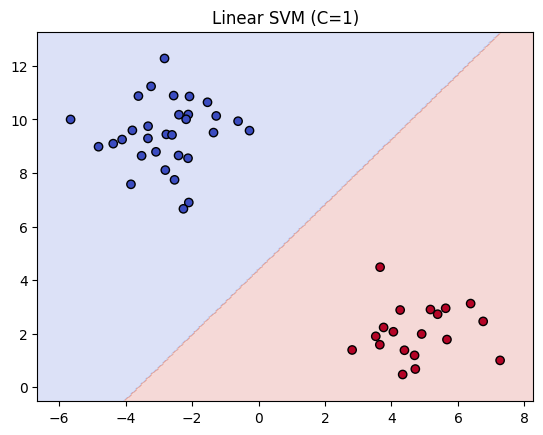

In [2]:
# Data sintetis separable
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Latih SVM linear dengan C=1
lin_svc = svm.SVC(kernel="linear", C=1.0)
lin_svc.fit(X_train, y_train)
y_pred = lin_svc.predict(X_test)

print("Accuracy (linear SVM, C=1):", accuracy_score(y_test, y_pred))
plot_decision_boundary(lin_svc, X_test, y_test, "Linear SVM (C=1)")

## 2. Efek Parameter C

C=0.1, Accuracy=1.000


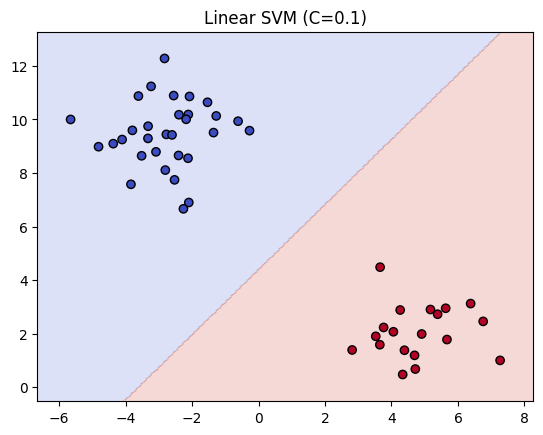

C=1, Accuracy=1.000


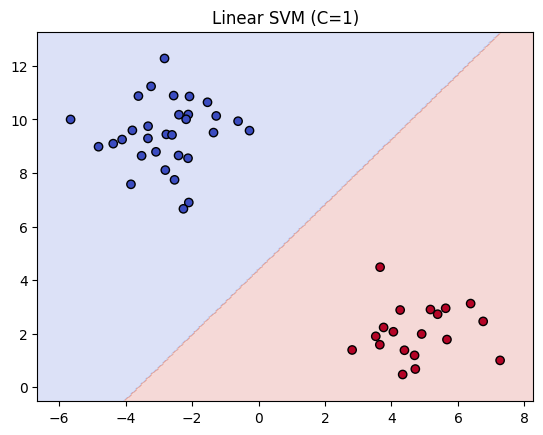

C=10, Accuracy=1.000


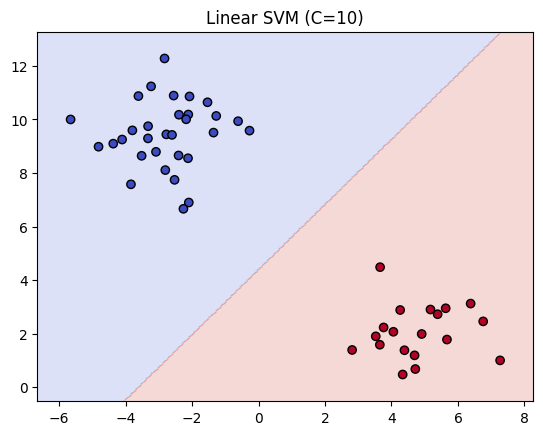

In [3]:
for C in [0.1, 1, 10]:
    svc = svm.SVC(kernel="linear", C=C).fit(X_train, y_train)
    print(f"C={C}, Accuracy={accuracy_score(y_test, svc.predict(X_test)):.3f}")
    plot_decision_boundary(svc, X_test, y_test, f"Linear SVM (C={C})")

## 3. Non‑Linear SVM dengan Kernel RBF

Accuracy (RBF SVM): 1.0


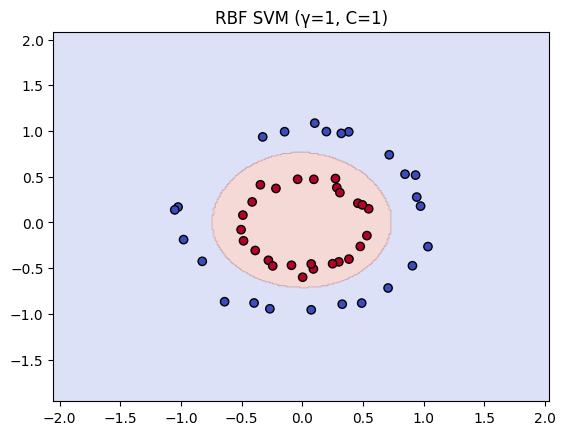

In [4]:
# Data sintetis tidak linier
X2, y2 = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

# Latih SVM RBF
rbf_svc = svm.SVC(kernel="rbf", gamma=1.0, C=1.0)
rbf_svc.fit(X2_train, y2_train)
print("Accuracy (RBF SVM):", accuracy_score(y2_test, rbf_svc.predict(X2_test)))
plot_decision_boundary(rbf_svc, X2_test, y2_test, "RBF SVM (γ=1, C=1)")

## 4. Tuning Hyperparameter (GridSearch)

Best params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy: 1.0


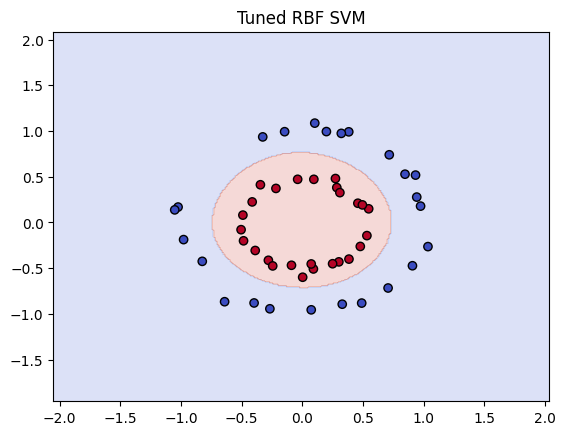

In [5]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(svm.SVC(), param_grid, cv=3)
grid.fit(X2_train, y2_train)
print("Best params:", grid.best_params_)
best_svc = grid.best_estimator_
print("Best accuracy:", accuracy_score(y2_test, best_svc.predict(X2_test)))
plot_decision_boundary(best_svc, X2_test, y2_test, "Tuned RBF SVM")

## 5. SVM Regression (SVR)

SVR RMSE: 0.015880892248650445


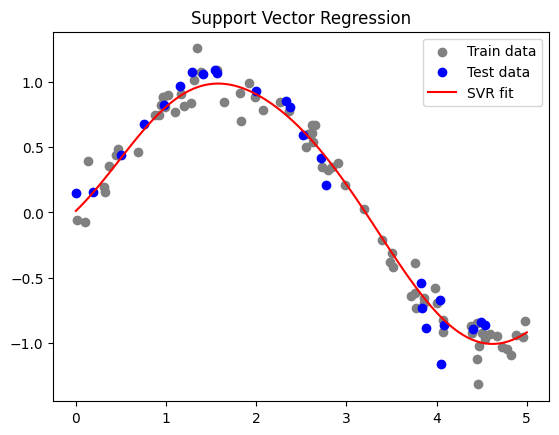

In [7]:
from sklearn.svm import SVR

# Data regression sintetis
Xr = np.sort(5 * np.random.rand(100,1), axis=0)
yr = np.sin(Xr).ravel() + 0.1 * np.random.randn(100)

# Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, random_state=42)

# Latih SVR dengan RBF kernel
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(Xr_train, yr_train)

# Evaluasi
yr_pred = svr.predict(Xr_test)
print("SVR RMSE:", mean_squared_error(yr_test, yr_pred))

# Plot hasil
plt.scatter(Xr_train, yr_train, color='gray', label='Train data')
plt.scatter(Xr_test, yr_test, color='blue', label='Test data')
X_plot = np.linspace(0,5,100).reshape(-1,1)
plt.plot(X_plot, svr.predict(X_plot), 'r-', label='SVR fit')
plt.legend()
plt.title("Support Vector Regression")
plt.show()

## Ringkasan Chapter 5

- **Linear SVM**: soft‑margin dengan parameter C.  
- **Kernel trick**: RBF & polynomial memungkinkan klasifikasi non‑linier.  
- **Hyperparameter tuning** (C, γ) penting untuk performa.  
- **SVR**: menerapkan prinsip SVM untuk regression dengan ε‑tube.